In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [13]:
# Assuming you've loaded your data into a DataFrame
# data = pd.read_csv('/home/alan-xie/Desktop/wifi_localization/data/csv/still/still.csv')  # Adjust this to your file
data = pd.read_csv('/home/alan-xie/Documents/Thesis/wifi_localization/data/csv/still/still.csv')

In [ ]:
data.drop('rssi', axis=1, inplace=True)
data.drop('rssi1', axis=1, inplace=True)
data.drop('rssi2', axis=1, inplace=True)
data.drop('rssi3', axis=1, inplace=True)
data.drop(columns=['coord1', 'coord2'], axis=1, inplace=True)

features = data.columns
X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
for i in range(1, X.shape[0]):
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X_scaled)
    explained_variance = pca.explained_variance_ratio_
    # print(f'Explained variance by each component: {explained_variance}')
    print(f"PCA with {i} components, sum is {sum(explained_variance)}.")
    
    if (sum(explained_variance) >= 0.85):
        break

X_pca = pca.fit_transform(X_scaled)


PCA with 1 components, sum is 0.30683718343664046.
PCA with 2 components, sum is 0.4143192168664793.
PCA with 3 components, sum is 0.4878479646646802.
PCA with 4 components, sum is 0.5574391709018369.
PCA with 5 components, sum is 0.6253411459214235.
PCA with 6 components, sum is 0.6919916999190263.
PCA with 7 components, sum is 0.7586204748817761.
PCA with 8 components, sum is 0.8245112226308005.
PCA with 9 components, sum is 0.8843308821205297.


In [15]:
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['coord1'])  # Color by one of your features
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA of CSI Data')
# plt.show()

In [16]:
# Get the PCA loadings
loadings = pca.components_

# Create a DataFrame to better view them
loading_df = pd.DataFrame(loadings, columns=features)

print(loading_df)


   timestamps   csi_len   channel  err_info   noise_floor      rate  \
0   -0.024097  0.448934 -0.000783 -0.013219  0.000000e+00  0.421607   
1   -0.026747 -0.084427 -0.004337  0.013904 -1.110223e-16 -0.110795   
2   -0.015947 -0.000236  0.011294 -0.011625  2.949030e-17 -0.002128   
3    0.724454 -0.039243  0.058722  0.044319 -5.551115e-17  0.014429   
4   -0.402233  0.035947 -0.069677 -0.029765  2.265983e-17  0.027395   
5   -0.057676  0.003831  0.966407 -0.244848  4.336809e-17  0.000710   
6   -0.035504 -0.000174  0.238879  0.959980 -2.203099e-16  0.000394   
7    0.330271 -0.044862 -0.022947 -0.118374  5.551115e-17 -0.040248   
8   -0.032197 -0.003939  0.002386 -0.001689  9.714451e-17  0.001128   

      bandWidth     num_tones            nr        nc  payload_length  \
0  3.388132e-21 -5.293956e-23  0.000000e+00  0.448934        0.072441   
1 -0.000000e+00 -4.336809e-19 -0.000000e+00 -0.084427        0.763238   
2  2.775558e-17 -0.000000e+00 -0.000000e+00 -0.000236        0.003395 

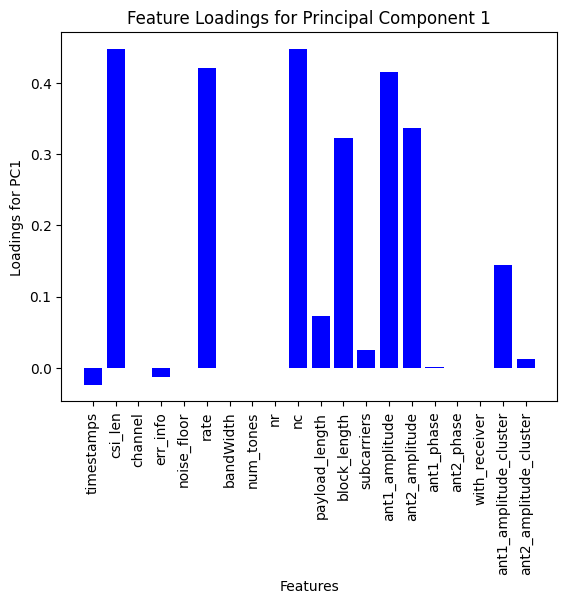

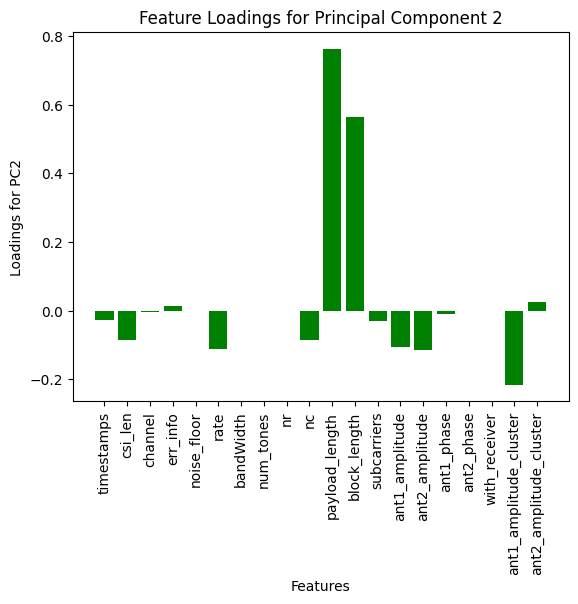

In [17]:
plt.bar(features, loadings[0], color='b')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Loadings for PC1')
plt.title('Feature Loadings for Principal Component 1')
plt.show()

plt.bar(features, loadings[1], color='g')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Loadings for PC2')
plt.title('Feature Loadings for Principal Component 2')
plt.show()


In [18]:
import numpy as np

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(f'Cumulative explained variance: {cumulative_variance}')


Cumulative explained variance: [0.30683718 0.41431922 0.48784796 0.55743917 0.62534115 0.6919917
 0.75862047 0.82451122 0.88433088]


In [19]:
pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X_scaled)

# Check the explained variance ratio for the chosen components
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')
print(f'SUM: {sum(explained_variance)}')


Explained variance by each component: [0.30683718 0.10748203 0.07352875 0.06959121 0.06790198 0.06665055
 0.06662877 0.06589075 0.05981966 0.05757527]
SUM: 0.9419061530624554


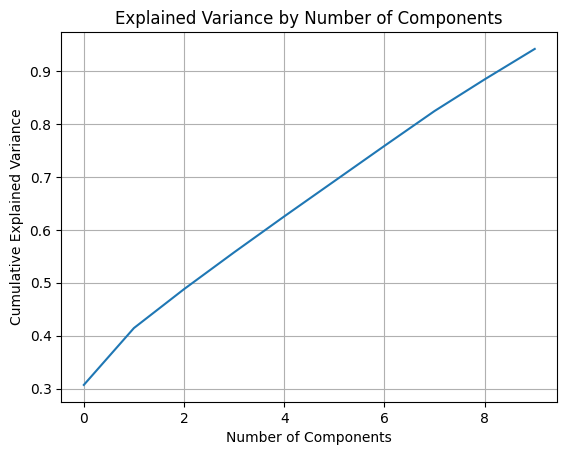

In [20]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()


In [21]:
# Remove exact duplicates
df = pd.DataFrame(X_reduced)
X_reduced_deduped = df.drop_duplicates()
